# Yellowbrick Examples 

Ths notebook is a sample of the examples that yellowbrick provids.

In [7]:
%matplotlib inline

import os
import sys 

# Modify the path 
sys.path.append("..")

import yellowbrick as yb 
import seaborn as sns 
import matplotlib as mpl 
import pandas as pd
import matplotlib.pyplot as plt 

(<matplotlib.axes._subplots.AxesSubplot at 0x10874dbd0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10895df90>)

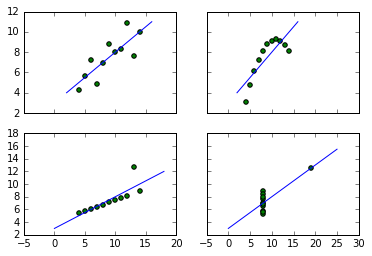

In [2]:
yb.anscombe()

/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


TypeError: 'int' object has no attribute '__getitem__'

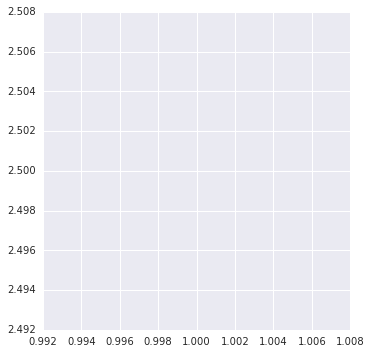

In [8]:
ax = sns.lmplot(0,1,pd.DataFrame([[1,2,3,4], [1,3,2,1,2]]) )